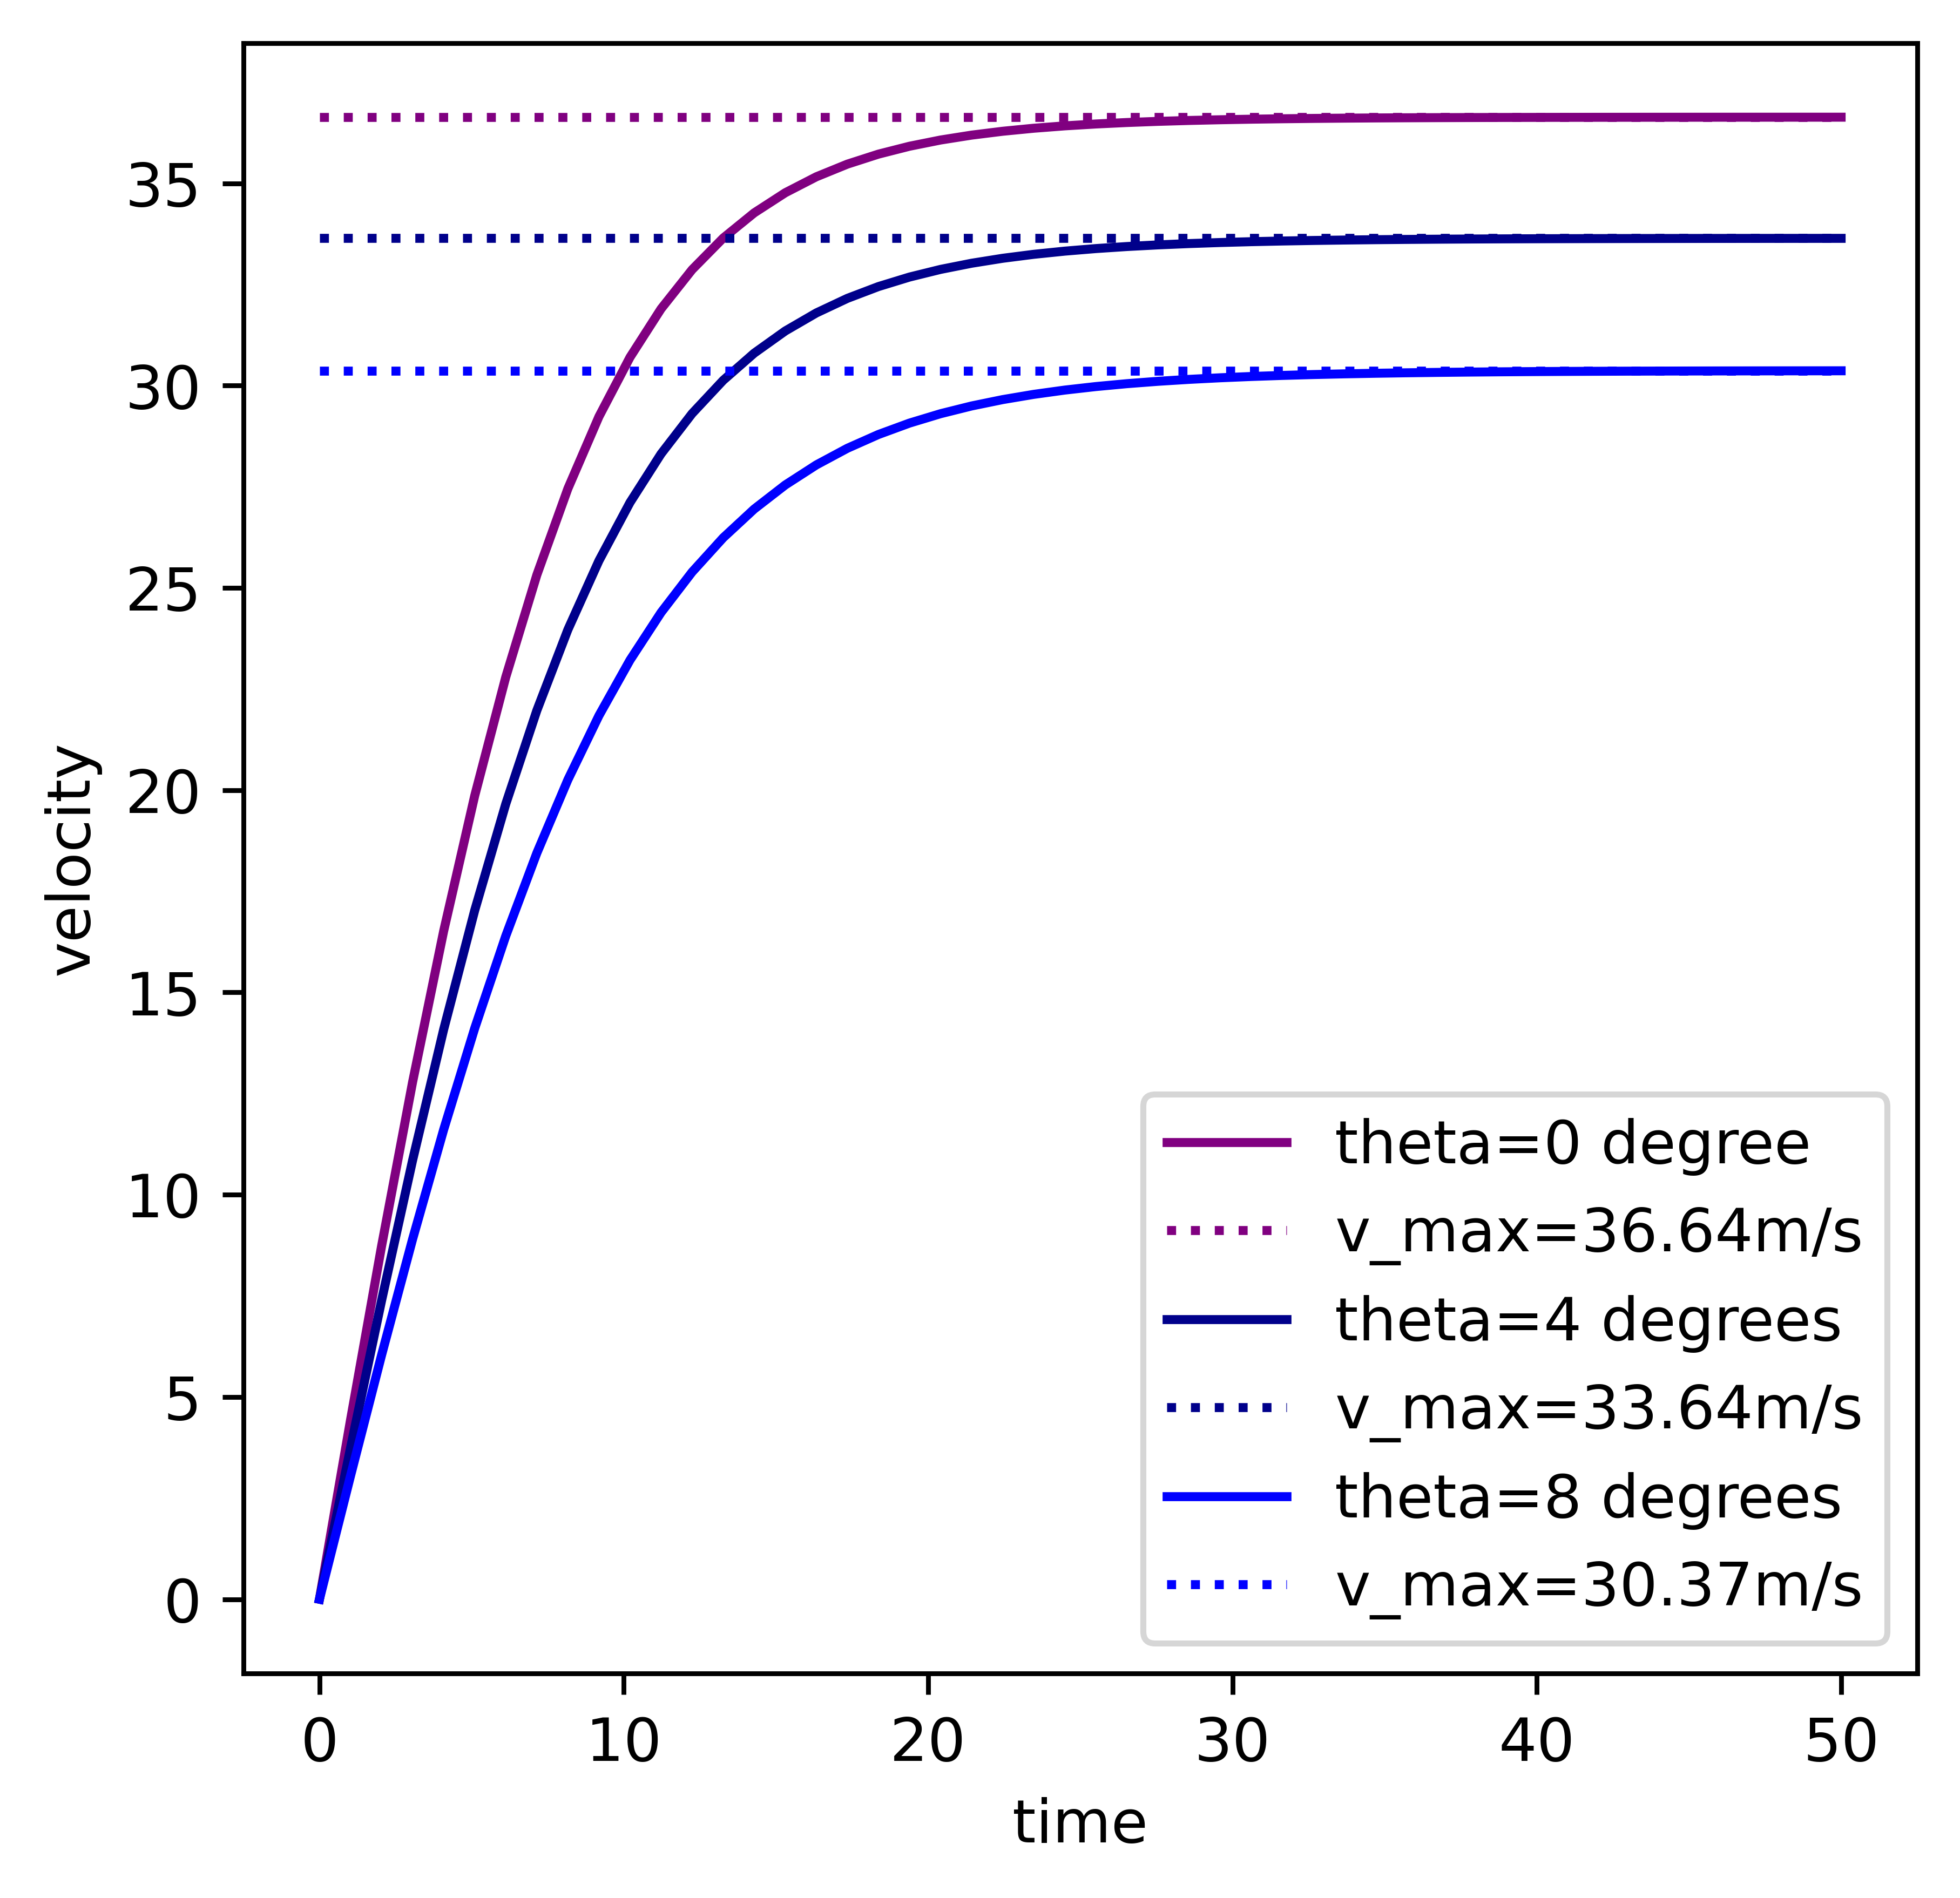

In [38]:
import math
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

m = 1 # kg
k_air=0.00324844 # kg/m
F_M = 12.2 # N/kg
g = 9.8 # m/s^2
miu = 0.6
r_wheel = 0.75 # m
# theta = 15

INF = 999999

def get_A(theta):
    return (F_M-(m*g*miu)/(r_wheel)-m*g*(math.sin(math.pi*theta/180.00)))

t = np.linspace(0,50)

theta=[0,4,8]
upper=[0,0,0]
A=[0,0,0]
analytical=[[0 for i in range(len(t))] for j in range(3)]
for i in range(3):
    A[i]=get_A(theta[i])
    for j in range(len(t)):
        analytical[i][j] = (math.sqrt(A[i])*np.tanh( (t[j]*math.sqrt(A[i]*k_air))/m ))/(math.sqrt(k_air))
    upper[i] = (math.sqrt(A[i])*np.tanh( (INF*math.sqrt(A[i]*k_air))/m ))/(math.sqrt(k_air))

    
newupper=[[0 for j in range(len(t))] for i in range(3)]
for i in range(3):
    newupper[i]=[upper[i] for j in range(len(t))]
colorset=['purple','darkblue','blue']
fig = plt.figure(figsize=(5,5), dpi=800)
for i in range(3):
    plt.plot(t,analytical[i],c=colorset[i])
    plt.plot(t,newupper[i],':',c=colorset[i])

plt.xlabel('time')
plt.ylabel('velocity')
plt.legend(['theta=0 degree','v_max='+str(round(upper[0],2))+'m/s',
            'theta=4 degrees','v_max='+str(round(upper[1],2))+'m/s',
            'theta=8 degrees','v_max='+str(round(upper[2],2))+'m/s'])
plt.show()    